<a href="https://colab.research.google.com/github/edsonajunior/Data-Science-study/blob/master/QuarentenaDados_aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lendo os dados do MovieLens

In [56]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


O MovieLens conta com outras informações que estão em bases separadas, uma delas é a de avaliações. 

Importando a base de avaliações.

In [8]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [58]:
# Total de avaliações
len(avaliacoes)

100836

In [59]:
# Renomeando colunas
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Uma forma para "separar" as informações apenas do **filmeId 1** é chamando o método ```avaliacaoes.query("filmeId==1")```, esse método retornará apenas as linhas para quais a expressão booleana, "filmeId==1", for verdadeira.

In [12]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Tendo as informações do **filmeId 1** podemos chamar o ```avaliacoes_do_filme_1.describe()```, para analisar as estatítiscas gerais dos dados.

In [13]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Caso queira uma estatística particular, podemos apenas chamar o método desajado, repare abaixo como calculamos apenas a média das avaliações do **filmeId 1**.

In [14]:
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

Calculamos as estatísicas apenas para o **filmeId 1**, mas também podemos chamar o método ```.describe()``` para a base completa (avaliacões).

In [15]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Calculando a média da nota.
Com o comando ```avaliacoes["nota"]```, obtemos os valores da coluna nota. 


In [16]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Para calcular a média de todas as notas.

In [17]:
avaliacoes["nota"].mean()

3.501556983616962

Calcular a **média** das notas para todos os filmes



In [19]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Temos as notas médias calculadas, mas agora precisamos juntar as informações de notas médias com a base de dados **filmes**.

Poderíamos criar uma nova coluna e atribuir a váriável `notas_medias_por_filme`, de forma direta:

```filmes["nota_media"] = notas_medias_por_filme```

Como discutimos em aula, essa não é uma boa prática pois precisamos garantir que a nota média seja do respectivo filme.

Para garantir essa condição vamos utilizar o ```.join()```, criando um novo dataframe (```filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")```). 

Veja como fazer, nas células a seguir.

In [20]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [21]:
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [22]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Agora que temos as médias, que tal visualizar o nosso dataframe ordenado pela nota de forma decrescente?

In [23]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


## Desafio 1 do professor [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


In [30]:
Nota_null = filmes_com_media['nota'].isnull()
filmes_com_media[Nota_null]

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2 do professor [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [37]:
rename_nota = filmes_com_media.rename(columns={'nota': 'nota_media'})
rename_nota.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3 do professor [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [32]:
total_notas_filme = filmes_com_media.groupby('filmeId')['nota'].count()
total_notas_filme_votos = rename_nota.join(total_notas_filme, on='filmeId')
total_notas_filme_votos = total_notas_filme_votos.rename(columns={'nota': 'total_votos'})
total_notas_filme_votos.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1


## Desafio 4 do professor [Thiago Gonçalves](https://twitter.com/tgcsantos)


Arredondar as médias (coluna de nota média) para duas casas decimais.

In [33]:
round_notas_medias_por_filme = filmes_com_media.round({'nota': 2})
round_notas_medias_por_filme.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


## Desafio 5 do professor [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [34]:
generos = pd.DataFrame()
generos['generos'] = filmes['generos'].str.split(pat='|').explode().unique()
generos

,generos
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


## Desafio 6 da professora [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [53]:
filmes_por_generos = pd.DataFrame()
filmes_por_generos["genero"] = filmes['generos'].str.split(pat='|').explode()
total_por_genero = pd.DataFrame()
total_por_genero = filmes_por_generos.drop_duplicates()
total_por_genero_count = filmes_por_generos.groupby("genero")["genero"].count()
total_por_genero_count.name = "Total por genero"
total_por_genero = total_por_genero.join(total_por_genero_count, on="genero")
total_por_genero = total_por_genero.rename(columns={'genero': 'Genero'})
total_por_genero = total_por_genero.sort_values('Genero', ascending=True)
total_por_genero

,Genero,Total por genero
8517,(no genres listed),34
5,Action,1828
0,Adventure,1263
0,Animation,611
0,Children,664
0,Comedy,3756
5,Crime,1199
69,Documentary,440
3,Drama,4361
0,Fantasy,779


## Desafio 7 do professor [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

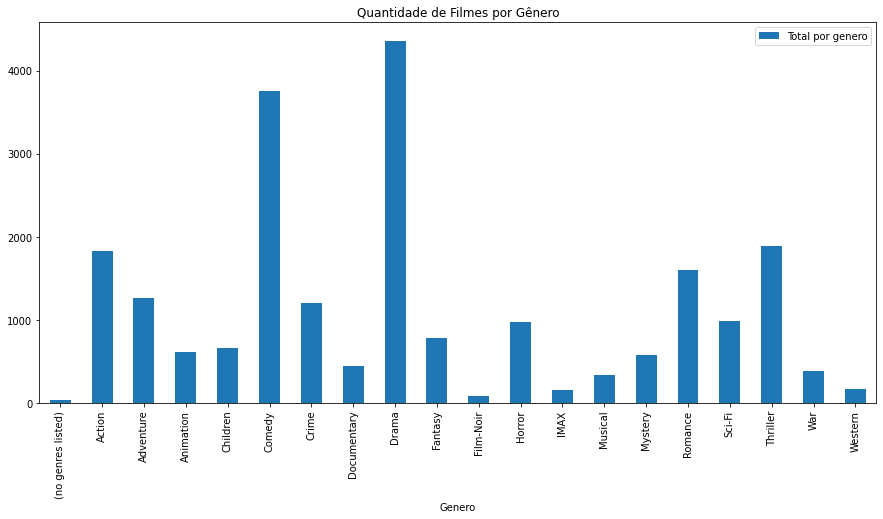

In [61]:
import matplotlib.pyplot as plt
total_por_genero.plot(kind='bar', x="Genero", y="Total por genero")
plt.title("Quantidade de Filmes por Gênero")
plt.rcParams["figure.figsize"] = [15,7]
plt.show()